# Безусловная генерация

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffusion import DiffusionRunner
from ddpm_sde import DDPM_SDE
from default_mnist_config import create_default_mnist_config

/home/doctor/anaconda3/envs/airi_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
import torchvision

def show(img):
    # npimg = img.numpy()
    img = img.transpose(2, 0, 1)
    # print(img.shape)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')


In [11]:
config = create_default_mnist_config()
runner = DiffusionRunner(config, eval=True)
runner.restore_parameters()

In [12]:
prev_mode = runner.model.training

runner.model.eval()
runner.switch_to_ema()

images = runner.sample_images(runner.config.training.snapshot_batch_size, labels=None).cpu()
nrow = int(math.sqrt(runner.config.training.snapshot_batch_size))
grid = torchvision.utils.make_grid(images, nrow=nrow).permute(1, 2, 0)
grid = grid.data.numpy().astype(np.uint8)

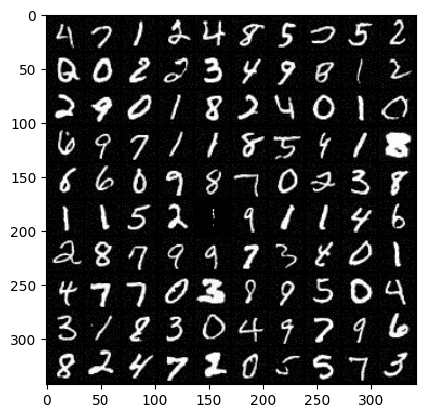

In [13]:
show(grid)

## Classifier-Guidance

In [4]:
from diffusion import ClassGuidDiffusionRunner 

In [5]:
config = create_default_mnist_config()
runner = ClassGuidDiffusionRunner(config, eval=True)
runner.restore_parameters()
runner

In [8]:
runner.model.eval()
runner.switch_to_ema()

images = runner.sample_images(runner.config.training.snapshot_batch_size, labels=None).cpu()
# images = runner.sample_images(1, labels=None).cpu()

nrow = int(math.sqrt(runner.config.training.snapshot_batch_size))
grid = torchvision.utils.make_grid(images, nrow=nrow).permute(1, 2, 0)
grid = grid.data.numpy().astype(np.uint8)

tensor(-0.0072, device='cuda:0') tensor(-0.0007, device='cuda:0')
tensor(-0.0073, device='cuda:0') tensor(-0.0003, device='cuda:0')
tensor(-0.0073, device='cuda:0') tensor(0.0011, device='cuda:0')
tensor(-0.0072, device='cuda:0') tensor(0.0016, device='cuda:0')
tensor(-0.0070, device='cuda:0') tensor(0.0022, device='cuda:0')
tensor(-0.0067, device='cuda:0') tensor(0.0032, device='cuda:0')
tensor(-0.0064, device='cuda:0') tensor(0.0043, device='cuda:0')
tensor(-0.0062, device='cuda:0') tensor(0.0054, device='cuda:0')
tensor(-0.0058, device='cuda:0') tensor(0.0066, device='cuda:0')
tensor(-0.0055, device='cuda:0') tensor(0.0072, device='cuda:0')
tensor(-0.0052, device='cuda:0') tensor(0.0071, device='cuda:0')
tensor(-0.0048, device='cuda:0') tensor(0.0074, device='cuda:0')
tensor(-0.0045, device='cuda:0') tensor(0.0073, device='cuda:0')
tensor(-0.0045, device='cuda:0') tensor(0.0080, device='cuda:0')
tensor(-0.0042, device='cuda:0') tensor(0.0088, device='cuda:0')
tensor(-0.0038, device=

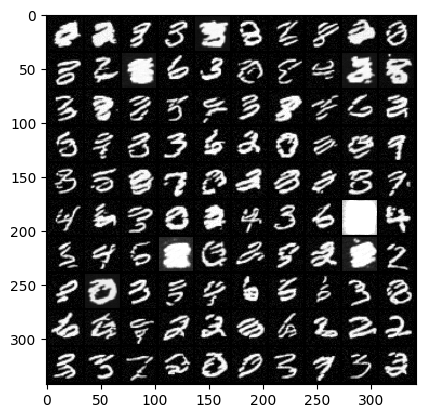

In [9]:
show(grid)